In [1]:
#importing libraries for this project
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#readng data from directory
df= pd.read_csv(r'''C:\Users\Mukhtar\Desktop\DATASET\nigeria_houses_data.csv''')
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [3]:
#shape of our data.
df.shape

(24326, 8)

In [4]:
df.state.unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [5]:
# we'll be focusing mainly on abuja and lagos because they are the two main location which has the highest data points.
df1=df[df['state'].isin(['Abuja','Lagos'])]
df1.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [6]:
df1.shape

(21969, 8)

In [7]:
df1.state.value_counts()

Lagos    18445
Abuja     3524
Name: state, dtype: int64

In [8]:
#value counts of the towns in lagos state
df1['town'][df['state']=='Lagos'].value_counts().sample(5)

Idimu                      9
Victoria Island (VI)     493
Alimosho                 142
Ajah                    2142
Ikorodu                  236
Name: town, dtype: int64

In [9]:
#value counts of the towns in state state
df1['town'][df1['state']=='Abuja'].value_counts().sample(5)

Kabusa       8
Jabi        88
Jikwoyi      1
Dakibiyu     7
Nyanya       3
Name: town, dtype: int64

In [10]:
#searching for missing values
df1.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [11]:
df1.sample(4)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2029,4.0,4.0,5.0,5.0,Semi Detached Duplex,Ogudu,Lagos,150000000.0
4032,3.0,3.0,4.0,2.0,Detached Duplex,Ogudu,Lagos,40000000.0
19578,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,55000000.0
5492,3.0,3.0,4.0,4.0,Detached Bungalow,Ibeju Lekki,Lagos,19000000.0


In [12]:
df1.shape

(21969, 8)

In [13]:
df2 = df1[(df1.bedrooms==df1.bathrooms) | (df1.bedrooms==df1.bathrooms -1) | (df1.bedrooms==df1.bathrooms -2)]

In [14]:
df2.title.unique()

array(['Terraced Duplexes', 'Detached Duplex', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [15]:
# locations that has less than 10 data points are also filtered out.
location = df2.groupby('town')['town'].agg('count')

In [16]:
location.head()

town
Agbara-Igbesa       3
Agege             101
Ajah             2064
Alimosho          107
Amuwo Odofin       37
Name: town, dtype: int64

In [17]:
len(location<10)

98

In [18]:
xx= location[location<=10]
xx.head()

town
Agbara-Igbesa                 3
Apapa                        10
Badagry                       7
Bwari                         8
Central Business District     3
Name: town, dtype: int64

In [19]:
# towns that have less 10 or less than 10 data points are combined into the 'other' category.
df2.town = df2.town.apply(lambda x: 'other' if x in xx else x)

C:\Users\Mukhtar\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df2.sample(7)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
23562,5.0,5.0,5.0,4.0,Detached Duplex,Ikeja,Lagos,50000000.0
21487,5.0,5.0,6.0,6.0,Detached Duplex,Lekki,Lagos,180000000.0
10562,6.0,6.0,6.0,7.0,Terraced Duplexes,Guzape District,Abuja,120000000.0
23455,5.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,140000000.0
7624,5.0,5.0,6.0,4.0,Detached Duplex,Ikoyi,Lagos,400000000.0
16590,4.0,4.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,90000000.0
6354,5.0,5.0,6.0,4.0,Detached Duplex,Ajah,Lagos,200000000.0


In [21]:
df2.shape

(20920, 8)

In [22]:
df2.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [23]:
df2.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24321,2.0,2.0,2.0,4.0,Block of Flats,other,Abuja,15000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0
24325,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [24]:
len(df2.town)

20920

In [25]:
len(df2[df2['town']=='other'])

156

In [26]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0


In [27]:
# a new column is added to the data frame called 'per_sqrmtr' in order to further remove outliers from the price column.
df2['per_sqrmtr'] = [150 if bedrooms <= 1 else 300 if bedrooms <= 2 else 450 if bedrooms <= 3 else 600 if bedrooms <= 4 else 750 if bedrooms <= 5 else 900 if bedrooms <= 6 else 1050 if bedrooms <= 7 else 1200 if bedrooms <= 8 else 1350 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]
df2.head()

<ipython-input-27-3006330ffe87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['per_sqrmtr'] = [150 if bedrooms <= 1 else 300 if bedrooms <= 2 else 450 if bedrooms <= 3 else 600 if bedrooms <= 4 else 750 if bedrooms <= 5 else 900 if bedrooms <= 6 else 1050 if bedrooms <= 7 else 1200 if bedrooms <= 8 else 1350 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750


In [28]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750


In [29]:
#a new column is created for specific conditions based on how many bedrooms a house has. 
df2['prices']= [15000000 if bedrooms <=1 else 30000000 if bedrooms <=2 else 45000000 if bedrooms <=3 else 70000000 if bedrooms <= 4 else 100000000 if bedrooms <=5 else 130000000 if bedrooms <= 6 else 165000000  if bedrooms <= 7 else 200000000 if bedrooms <= 8 else 250000000 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]

<ipython-input-29-dbddcd7a34d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prices']= [15000000 if bedrooms <=1 else 30000000 if bedrooms <=2 else 45000000 if bedrooms <=3 else 70000000 if bedrooms <= 4 else 100000000 if bedrooms <=5 else 130000000 if bedrooms <= 6 else 165000000  if bedrooms <= 7 else 200000000 if bedrooms <= 8 else 250000000 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]


In [30]:
df2.bathrooms.value_counts()

5.0    9846
4.0    5898
6.0    2210
3.0    1624
2.0     500
7.0     448
8.0     157
9.0     135
1.0     102
Name: bathrooms, dtype: int64

In [31]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000


In [32]:
df2.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'per_sqrmtr', 'prices'],
      dtype='object')

In [33]:
df2['pricess'] = df2.apply(lambda row: row['prices']*1.5 if row['bathrooms'] ==1
                          else row['prices']*2 if row['bathrooms']==2
                          else row['prices']*2.5 if row['bathrooms']==3
                          else row['prices']*3 if row['bathrooms']==4
                          else row['prices']*3.5 if row['bathrooms']==5
                          else row['prices']*4 if row['bathrooms']==6
                          else row['prices']*4.5 if row['bathrooms']==7
                          else row['prices']*5 if row['bathrooms']==8
                          else row['prices']*5.5 if row['bathrooms']==9 else row['prices'], axis =1)

<ipython-input-33-e8fb152297e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pricess'] = df2.apply(lambda row: row['prices']*1.5 if row['bathrooms'] ==1


In [34]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0


In [35]:
df3 = df2[~(df2.title== 'Block of Flats')]
df3.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0


In [36]:
df3.title.value_counts()

Detached Duplex           12712
Terraced Duplexes          3091
Semi Detached Duplex       2471
Detached Bungalow          1220
Semi Detached Bungalow      290
Terraced Bungalow            93
Name: title, dtype: int64

In [37]:
df3.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'per_sqrmtr', 'prices', 'pricess'],
      dtype='object')

In [38]:
df3[df3.bedrooms==1].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,2.000000e+08,150,15000000,22500000.0
425,1.0,1.0,1.0,1.0,Semi Detached Duplex,Katampe,Abuja,2.000000e+08,150,15000000,22500000.0
502,1.0,1.0,2.0,4.0,Detached Duplex,Asokoro District,Abuja,1.500000e+09,150,15000000,22500000.0
1214,1.0,1.0,1.0,1.0,Detached Duplex,Magodo,Lagos,1.600000e+08,150,15000000,22500000.0
1246,1.0,1.0,1.0,2.0,Detached Duplex,Lekki,Lagos,8.000000e+06,150,15000000,22500000.0


In [39]:
df4 = df3[(df3.bathrooms==df3.toilets) | (df3.bathrooms==df3.toilets -1)]
df4.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0


In [40]:
df4.shape

(19245, 11)

In [41]:
df5 = df4[~(df4.bedrooms==df4.parking_space -5) | (df4.bedrooms==df4.parking_space -7)]
df5.sample(7)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess
7311,5.0,6.0,6.0,4.0,Detached Duplex,Lekki,Lagos,250000000.0,750,100000000,400000000.0
4525,5.0,5.0,6.0,6.0,Detached Duplex,Lekki,Lagos,310000000.0,750,100000000,350000000.0
10005,5.0,6.0,6.0,4.0,Detached Duplex,Lekki,Lagos,250000000.0,750,100000000,400000000.0
19473,5.0,5.0,6.0,9.0,Detached Duplex,Lekki,Lagos,220000000.0,750,100000000,350000000.0
14068,4.0,5.0,5.0,4.0,Detached Duplex,Ikoyi,Lagos,900000000.0,600,70000000,245000000.0
13434,4.0,4.0,5.0,4.0,Terraced Duplexes,Wuye,Abuja,56000000.0,600,70000000,210000000.0
7125,4.0,4.0,5.0,2.0,Detached Duplex,Lekki,Lagos,80000000.0,600,70000000,210000000.0


In [42]:
df5['pricesss'] = df5.apply(lambda row: row['pricess']-10000000 if row['parking_space'] ==9
                          else row['pricess'] - 20000000 if row['parking_space']==8
                          else row['pricess']-30000000 if row['parking_space']==7
                          else row['pricess']-40000000 if row['parking_space']==6
                          else row['pricess']-50000000 if row['parking_space']==5
                          else row['pricess']-2000000 if row['parking_space']==3
                          else row['pricess'], axis =1)

<ipython-input-42-f0b8dd714cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['pricesss'] = df5.apply(lambda row: row['pricess']-10000000 if row['parking_space'] ==9


In [43]:
df5.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess,pricesss
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0,170000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0,350000000.0


In [44]:
df5 = df5.drop([10991,22037,6252,23557,10991,22037,18559,22313], axis = 0)
df5.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess,pricesss
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0,170000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0,350000000.0


In [45]:
df6 = df5[~(df5.town == 'other')]
df6.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,per_sqrmtr,prices,pricess,pricesss
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,600,70000000,245000000.0,245000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,600,70000000,245000000.0,245000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,600,70000000,210000000.0,170000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,600,70000000,210000000.0,210000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0,750,100000000,350000000.0,350000000.0


###  *At this point of our project we are trying to break down our data in order to perform more data cleaning and to be able to perform depth analysis and to able to plot graphs as well.*

In [46]:
len(df6)

19091

C:\Users\Mukhtar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pricesss'>

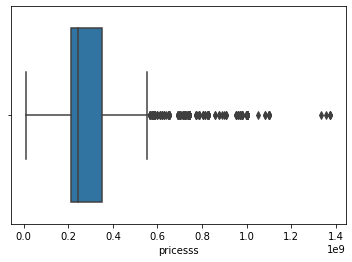

In [47]:
sns.boxplot(df6.pricesss)

In [48]:
df6.pricesss.std()

121046490.21627615

In [49]:
len(df6)

19091

C:\Users\Mukhtar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pricesss'>

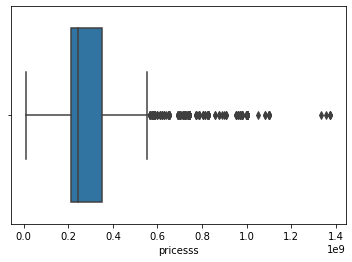

In [50]:
sns.boxplot(df6.pricesss)

C:\Users\Mukhtar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pricesss', ylabel='Density'>

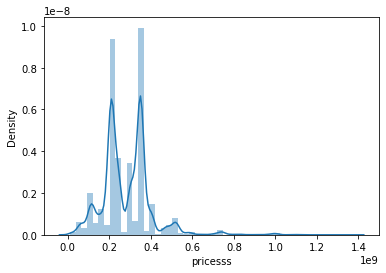

In [51]:
sns.distplot(df6.pricesss)

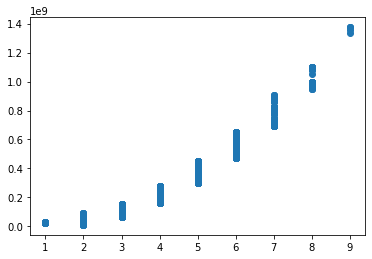

In [52]:
plt.scatter(df6.bedrooms,df6.pricesss)
plt.show()

C:\Users\Mukhtar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pricesss'>

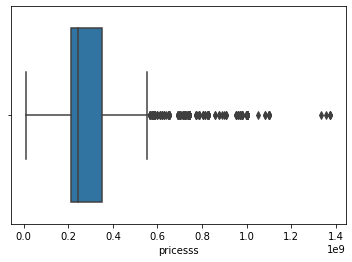

In [53]:
sns.boxplot(df6.pricesss)

In [54]:
df7 = df6.drop(['toilets','parking_space','per_sqrmtr','price','prices','pricess'], axis = 1)
df7.head()

,bedrooms,bathrooms,title,town,state,pricesss
1,4.0,5.0,Terraced Duplexes,Katampe,Abuja,245000000.0
2,4.0,5.0,Detached Duplex,Lekki,Lagos,245000000.0
3,4.0,4.0,Detached Duplex,Ajah,Lagos,170000000.0
4,4.0,4.0,Semi Detached Duplex,Lekki,Lagos,210000000.0
5,5.0,5.0,Detached Duplex,Lekki,Lagos,350000000.0


In [55]:
df7.columns

Index(['bedrooms', 'bathrooms', 'title', 'town', 'state', 'pricesss'], dtype='object')

In [56]:
len(df7)

19091

In [57]:
df7.pricesss.max(), df7.pricesss.min()

(1375000000.0, 10000000.0)

In [58]:
df7.bedrooms.value_counts()

5.0    8276
4.0    7609
3.0    1652
6.0     906
2.0     326
7.0     188
8.0      72
1.0      57
9.0       5
Name: bedrooms, dtype: int64

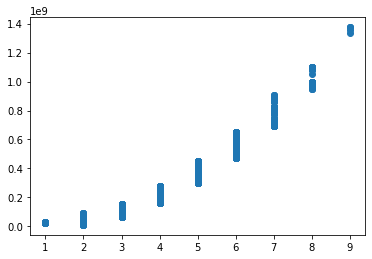

In [59]:
plt.scatter(df7.bedrooms,df7.pricesss)
plt.show()

In [60]:
df7.head()

,bedrooms,bathrooms,title,town,state,pricesss
1,4.0,5.0,Terraced Duplexes,Katampe,Abuja,245000000.0
2,4.0,5.0,Detached Duplex,Lekki,Lagos,245000000.0
3,4.0,4.0,Detached Duplex,Ajah,Lagos,170000000.0
4,4.0,4.0,Semi Detached Duplex,Lekki,Lagos,210000000.0
5,5.0,5.0,Detached Duplex,Lekki,Lagos,350000000.0


### MODEL BUILLDING

In [61]:
df7.title.unique()

array(['Terraced Duplexes', 'Detached Duplex', 'Semi Detached Duplex',
       'Detached Bungalow', 'Semi Detached Bungalow', 'Terraced Bungalow'],
      dtype=object)

In [62]:
title= pd.get_dummies(df7.title)
title.head()

,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0


In [63]:
town= pd.get_dummies(df7.town)
town.head()

,Agege,Ajah,Alimosho,Amuwo Odofin,Apo,Asokoro District,Ayobo,Dakwo,Durumi,Epe,...,Ojo,Ojodu,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
state=pd.get_dummies(df7.state)
state.head()

,Abuja,Lagos
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1


In [65]:
df8=pd.concat([df7,title,town,state],axis='columns')
df8.head()

,bedrooms,bathrooms,title,town,state,pricesss,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4.0,5.0,Terraced Duplexes,Katampe,Abuja,245000000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.0,5.0,Detached Duplex,Lekki,Lagos,245000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,4.0,Detached Duplex,Ajah,Lagos,170000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,4.0,Semi Detached Duplex,Lekki,Lagos,210000000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,5.0,5.0,Detached Duplex,Lekki,Lagos,350000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df9=df8.drop(['title','town','state'],axis=1)
df9.head()

,bedrooms,bathrooms,pricesss,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes,Agege,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4.0,5.0,245000000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4.0,5.0,245000000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,4.0,170000000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,4.0,210000000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5.0,5.0,350000000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df9.shape

(19091, 72)

In [68]:
df10= df9.drop('Agege',axis='columns')

In [69]:
df10.shape

(19091, 71)

In [70]:
X= df10.drop('pricesss', axis='columns')
X.head()

,bedrooms,bathrooms,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes,Ajah,Alimosho,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4.0,5.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.0,5.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,4.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,4.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5.0,5.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
y= df10['pricesss']
y.head()

1    245000000.0
2    245000000.0
3    170000000.0
4    210000000.0
5    350000000.0
Name: pricesss, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9206973502072628

In [74]:
def predict_price(title,town,state,bedrooms,bathrooms):
    title_index = np.where(X.columns==title)[0][0]
    town_index = np.where(X.columns==town)[0][0]
    state_index = np.where(X.columns==state)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[0] = bathrooms
    if title_index >=0:
        x[title_index] = 1
        if town_index>=0:
            x[town_index]=1
            if state_index>=0:
                x[state_index]=1
        
    return lr.predict([x])[0]

In [75]:
predict_price('Detached Duplex','Lekki','Lagos',5,6)

251498496.0

In [76]:
df6.title.value_counts()

Detached Duplex           12207
Terraced Duplexes          2998
Semi Detached Duplex       2416
Detached Bungalow          1103
Semi Detached Bungalow      279
Terraced Bungalow            88
Name: title, dtype: int64

In [77]:
df6.town.value_counts().head(20)

Lekki                   10154
Ajah                     1915
Ikoyi                    1322
Ikeja                     577
Ibeju Lekki               430
Victoria Island (VI)      393
Gwarinpa                  344
Magodo                    343
Life Camp                 268
Guzape District           249
Katampe                   230
Lokogoma District         180
Maitama District          171
Isheri North              162
Lugbe District            151
Wuye                      148
Ikorodu                   146
Apo                       124
Asokoro District          109
Jahi                      103
Name: town, dtype: int64

In [78]:
import pickle
with open('Naija_house_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [79]:
import json
columns = {'data_columns':[col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))